# Inspect your own data Facebook offers you to download

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
with open('.../html/security.htm', 'r') as f:
    for l in f:
        line = l
        
bs = BeautifulSoup(l.split('</head>', 1)[-1], 'lxml')

In [3]:
data = []
for p in bs.findAll('p', {'class':'meta'}):
    date = str(p).split('<br', 1)[0][16:].replace(' at', '')
    ip_address = str(p).split('IP Address: ', 1)[-1].split('<br', 1)[0]
    browser = str(p).split('Browser: ', 1)[-1].split('<br', 1)[0]
    cookies = str(p).split('Cookie: ', 1)[-1].split('</p', 1)[0]
    
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if date.startswith(day):
            data.append([date, ip_address, browser, cookies])

In [4]:
df = pd.DataFrame(data, columns=['Date', 'IP_Address', 'Browser', 'Cookie'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-04-04 20:06:00 to 2017-02-24 15:40:00
Data columns (total 3 columns):
IP_Address    612 non-null object
Browser       612 non-null object
Cookie        612 non-null object
dtypes: object(3)
memory usage: 19.1+ KB


In [5]:
import matplotlib.pyplot as plt

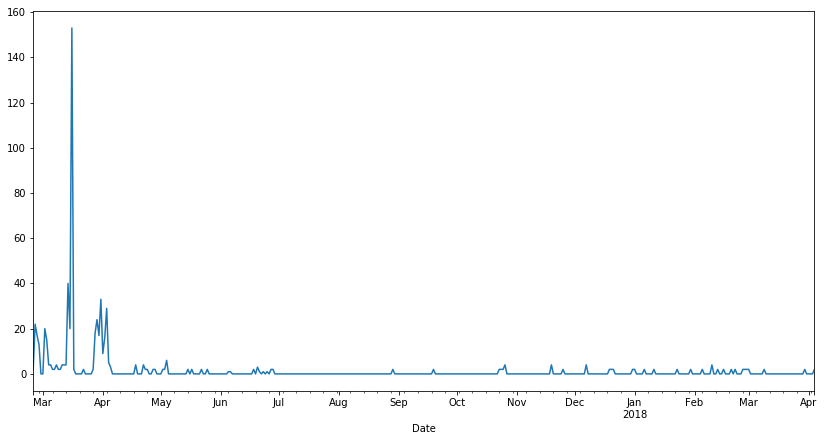

In [6]:
df.groupby(pd.TimeGrouper('D')).count()['IP_Address'].plot(figsize=(14,7))
plt.show()